# $\textbf{Thola Ngema}$

# Applied Maths Honours project: Logistic Equation In Population Growth

In [1]:
#------$ ---------------------- START --------------------------------$ ------#
import matplotlib
import numpy as np
import matplotlib.pyplot as plt # A package for plots
# matplotlib.pyplot is a library for plotting that has every
# plotting module bigger than pylab ( which is a subset of matplotlib ! )


# Set up fonts for the plots
matplotlib.rcParams.update({'font.size': 17, 'font.family': 'STIXGeneral',\
   'mathtext.fontset': 'stix'})

iPYTHON Notebook is a combination of python and LaTeX because it allows one to put sentences between code blocks, such as this one.
Since it $\textbf{LaTeX}$ compatible you can have equations in here too. Yes you can :-)
$$ \frac{dN}{dt} = r \frac{N ( K - N)}{K}$$, let $x = \frac{N}{K}$ then we have after simplification
$$ \frac{dx}{dt} = r x ( 1 - x ) $$
The analytical solution to this differential is called the $\textit{sigmoid function}$ and it is given by
$$ x(t) = \frac{1}{1 + (\frac{1 - x_{0}}{x_{0}})e^{-rt}} $$
Re-substituting  $x = \frac{N}{K}$ we have;
$$ N(t) =  \frac{K}{1 + (\frac{K-N_0}{N_0})e^{-rt} }$$
but here we will work in terms of $x$

In [2]:
# Second code block : Functions
def dxdt(x):
    '''
    This function returns the differential part
    every time x is changed.
    '''
    f    = r*x*(1.0 - x)
    return f
# define analytical solution
def x_an(K, N_0, t):
    '''
     Finds analytical solution given time
    '''
    num = 1 # numerator
    fac = (1-x0)/x0
    den = 1.0 + fac*np.exp(-r*t) # similar to math.exp(-r*t) 
    # divide the two expressions
    return num/den 

In [3]:
# Third code block
# --------------Initial conditions --------------------#

t_0    = 1.; # year one
t_f    = 100.0; # years
N_0    = 10. # 1/2 population size every kilometre in a area, you can change this
             # to see how it affects the stability of the solution
K      = 300. # also change this constant too
# Remember when tweaking these that K > N always! N and K must be floats not integers
x0     = N_0/K; # range from zero to one
#------------------------------------------------------#

In [4]:
# Fourth code block

# DEFINE  a stepsize
dt = 1. # TRY 0.01 , 0.001 AND see how ot affects the accuracy of
         # the solution. 
         #  Then try 1, 5 , 10, 100 etc
         # You should be able to intuitively see the correct stepsize from the
        # one that are giving you crap. Hint anything with dt > > 1 will probably won't work
# lists
xt        = []
exact_sol = []
t      = t_0 # initialize time to t0

# Start with r equal to -0.5, 0, 0.5,  1.5 etc
r      = 0.5
i      = 0 # initialize index, this has to be an int / integer
           # as lists can not be indexed by floats  
xt0     = x0 
tl   = []

In [5]:
# Fifth code block : LOOP
while t < t_f:
    exact_sol.append( x_an(K, N_0, t) ) # call the analytical solution
    tl.append(t) # save to the time keeper list
    xt0        = xt0 + dxdt(x0)*dt# increment using the differential equation
                                  # this is where we find the numerical solution
    xt.append(xt0) # save to the x solution list
    x0         = xt0 # re-shuffle to assign new value to x0 for previous l.o.c
                     # where by l.o.c = line of code
    i          = i+1
    t          = t + 1.

In [6]:
# Sixth code block: print statements
print 'Number of executions : ',i  
print "time                 : ", t
print "x solution           : ", xt0

Number of executions :  99
time                 :  100.0
x solution           :  1.0


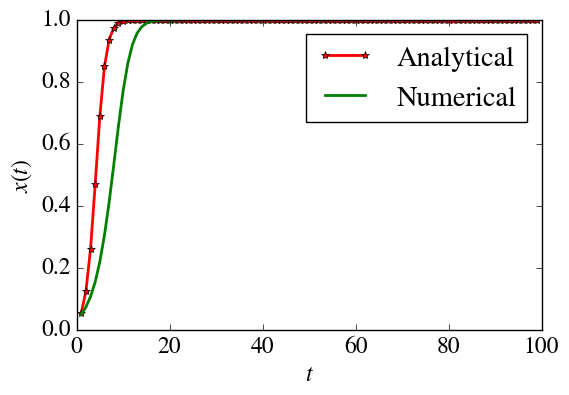

In [7]:
# Seventh code block: Plots
plt.figure()        
plt.plot(tl, exact_sol, 'r-*', label=r'Analytical', lw=2)
plt.plot(tl, xt, 'g', label=r'Numerical', lw=2) # lw = linewidth
#plt.yscale('log') # for high values of N_0 and K uncomment this in. Put it in!
plt.xlabel(r'$\it{t}$')
plt.ylabel(r'$\it{x}(t)$')
plt.legend(loc='best') 
plt.savefig('thola_graph1.png')